In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so
# 查看sns版本号
sns.__version__
# theme:{darkgrid, whitegrid, dark, white, ticks}
sns.set_style("darkgrid", {"font.sans-serif": ['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False
#sns.set(rc={"figure.figsize": (10, 10)})

# 数据集准备
tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")


# 格式调整


In [2]:
sns.set_theme(context='notebook'  # notebook, paper, talk, poster
              , style='darkgrid'  # darkgrid, whitegrid, dark, white, ticks
              , palette='pastel'  # deep, muted, bright, pastel, dark, colorblind
              , font='simhei'
              )
# 单个绘图颜色的调整可以给绘图函数传入palettec参数进行设置
# 标记点通过参数markers设置
# 线型通过参数linestyles设置


## palette 参数展示


In [3]:
sns.color_palette('pastel')


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

![seaborn绘图_1664694791879](https://gcore.jsdelivr.net/gh/kebuAAA/Picloud@main/seaborn绘图_1664694791879.png)


# 添加代理


在启动 jupyter 之前现在终端设置代理

```bash
set HTTP_PROXY=http://127.0.0.1:2580
set HTTPS_PROXY=http://127.0.0.1:2580
```

然后拖动文件到终端启动文件即可使用代理访问


# Replot


<AxesSubplot:title={'center':'time = Dinner'}, xlabel='total_bill', ylabel='tip'>

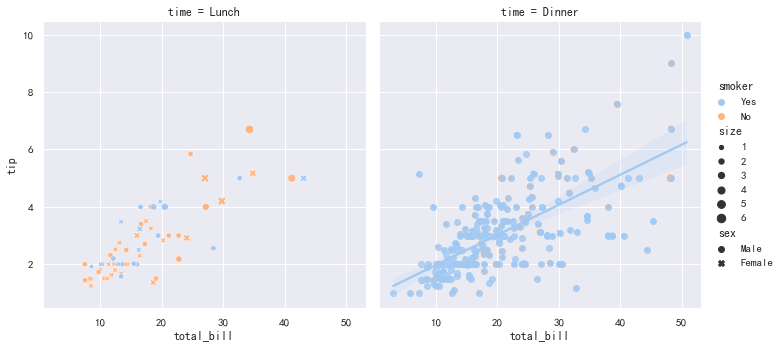

In [34]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    # palette="ch:r=-.5,l=.75",#自定义化颜色
    style="sex",
    size="size",
    # sizes=(15, 200),#自定义数据点大小
    col_wrap=2,
)
sns.regplot(data=tips, x="total_bill", y="tip")


## lineplot


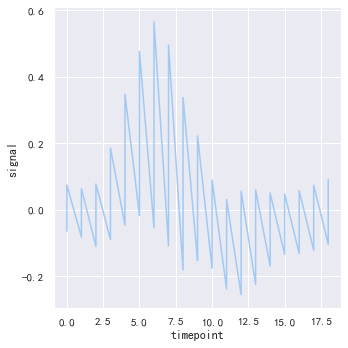

In [17]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    estimator=None,
    errorbar="sd",
)


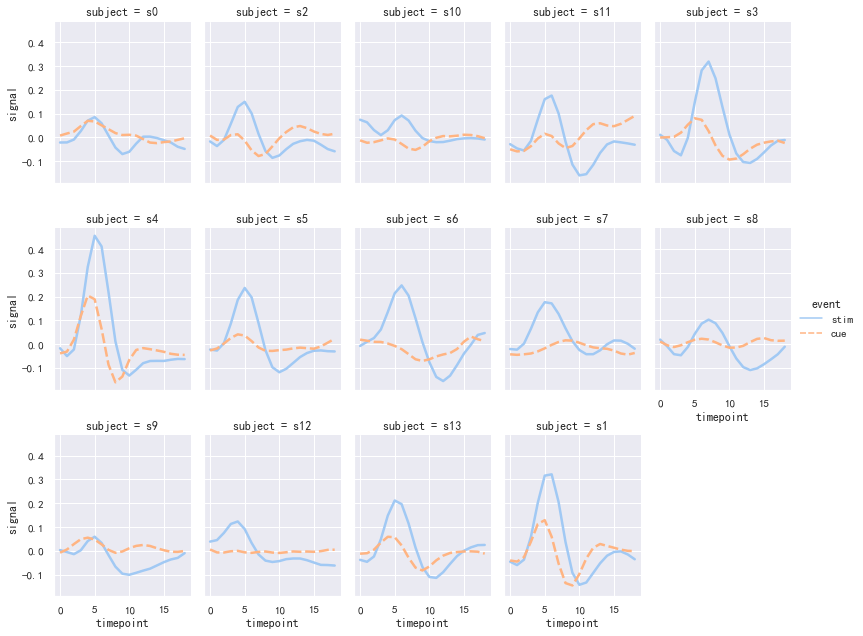

In [6]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)


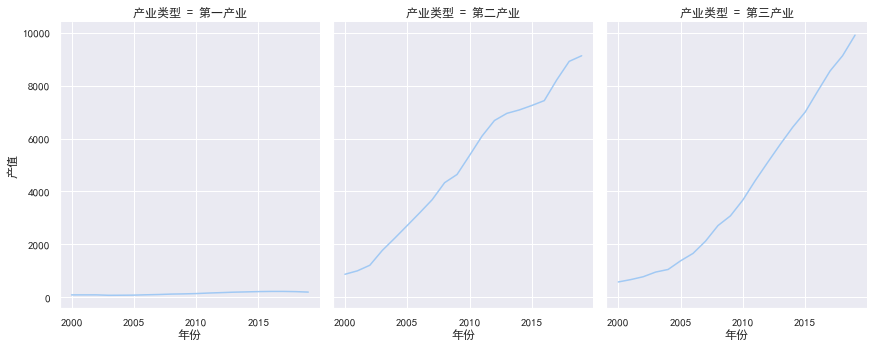

In [7]:
data = pd.read_excel('./datasets/历年地区生产总值.xlsx')
new_data = data.melt(id_vars=['年份'], var_name='产业类型', value_vars=[
                     '第一产业', '第二产业', '第三产业'], value_name='产值')
g = sns.relplot(new_data, kind='line', x='年份', y='产值',
                col='产业类型',  aspect=.82)
g.set_axis_labels('年份', '产值')


# Displot


## 频数图


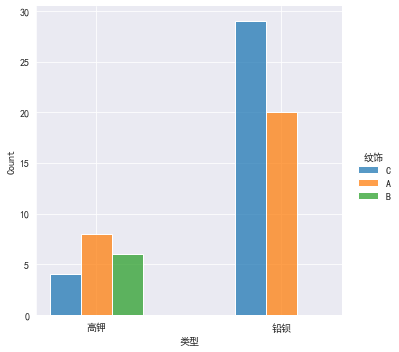

In [2]:
data = pd.read_excel('./datasets/desc-data.xlsx')
d = sns.displot(data, x="类型", hue='纹饰'                # , fill=True
                , shrink=.5                # ,bins=4#划分区间个数，也可以传入数字列表表示划分位置
                , multiple="dodge"  # 堆叠，dodge:分开
                )


c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 38078 (\N{CJK UNIFIED IDEOGRAPH-94BE}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 38085 (\N{CJK UNIFIED IDEOGRAPH-94C5}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 38049 (\N{CJK UNIFIED IDEOGRAPH-94A1}) missing from current font.
  self._figure.savefig(buffer, dpi=

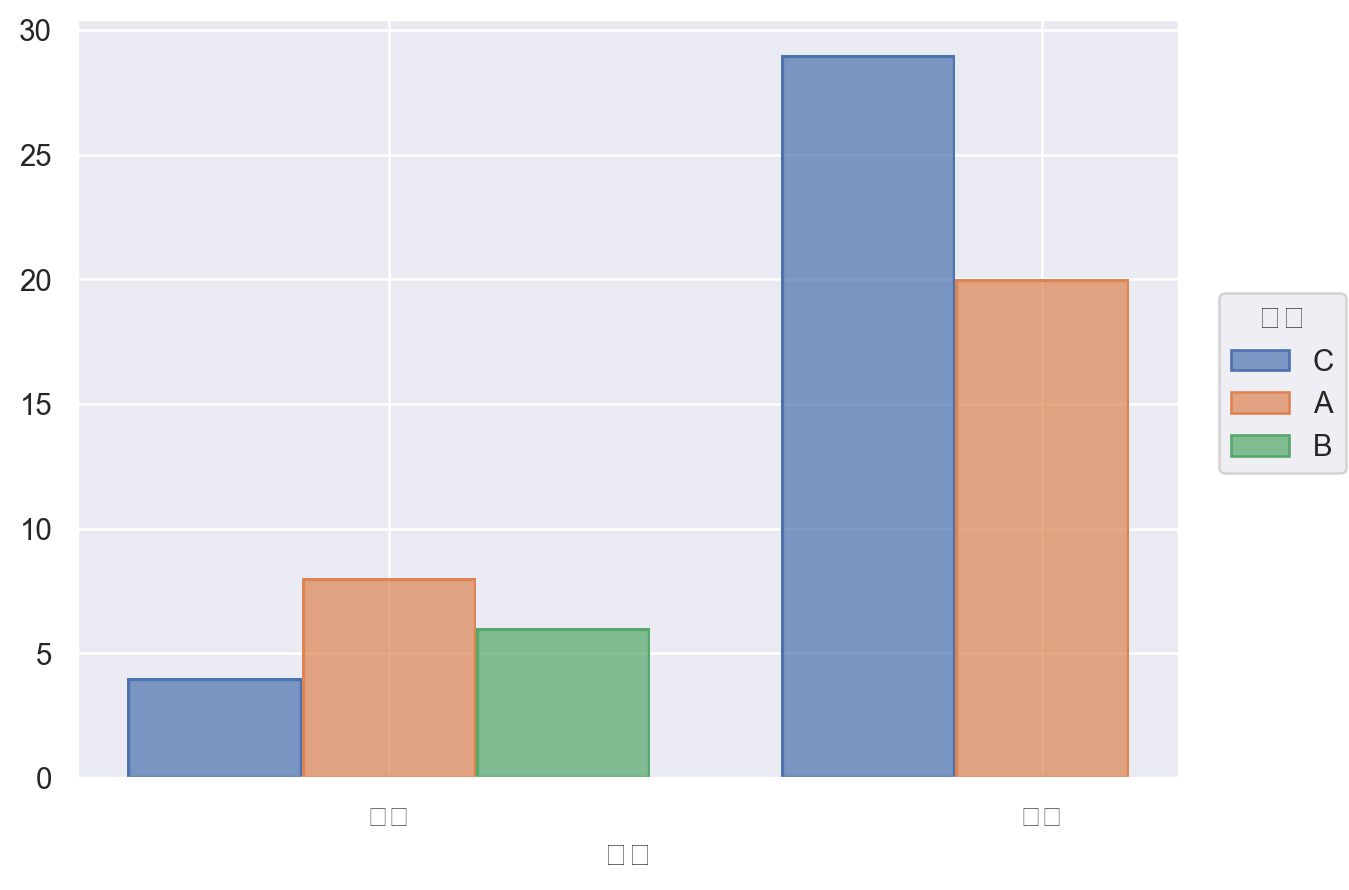

In [3]:
import seaborn.objects as so
(
    so.Plot(data, x="类型", color="纹饰")
    .add(so.Bar(), so.Hist(), so.Dodge())
)


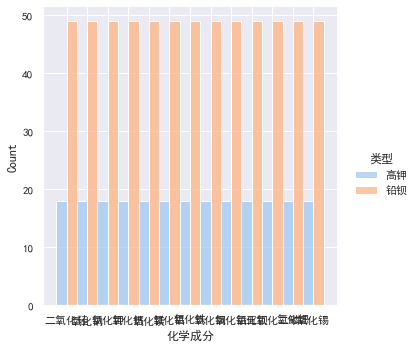

In [10]:
data = pd.read_excel('./datasets/desc-data.xlsx')
data_melt = data.melt(id_vars=['文物编号', '类型'], var_name=[
                      '化学成分'], value_vars=data.columns[6:-1], value_name='含量')
d = sns.displot(data_melt,
                x="化学成分", hue='类型', multiple="dodge"  # 堆叠，dodge:分开
                )


# kde密度图（堆叠条形图）

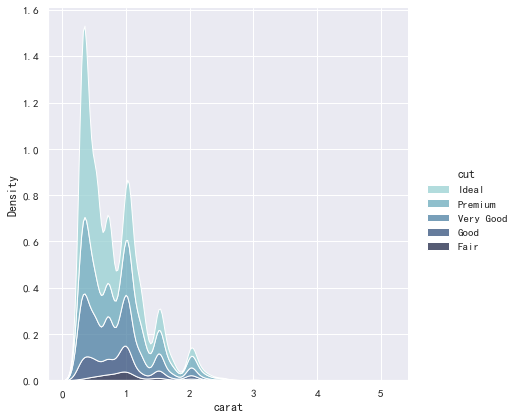

In [37]:
# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="stack", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
).savefig('./sns样图/堆叠折线图.png')


## 联合分布和边缘分布


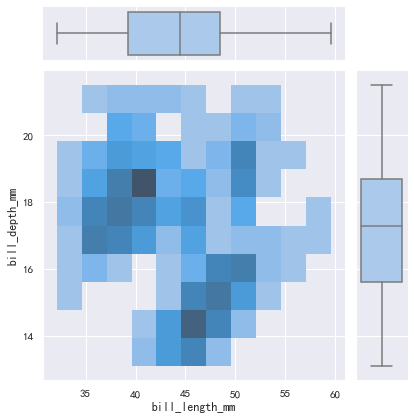

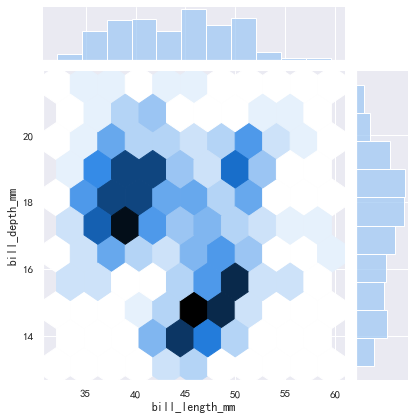

In [27]:
penguins = sns.load_dataset("penguins")
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
g.savefig('./sns样图/联合分布和边际分布.png')
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex")

## 多变量分布


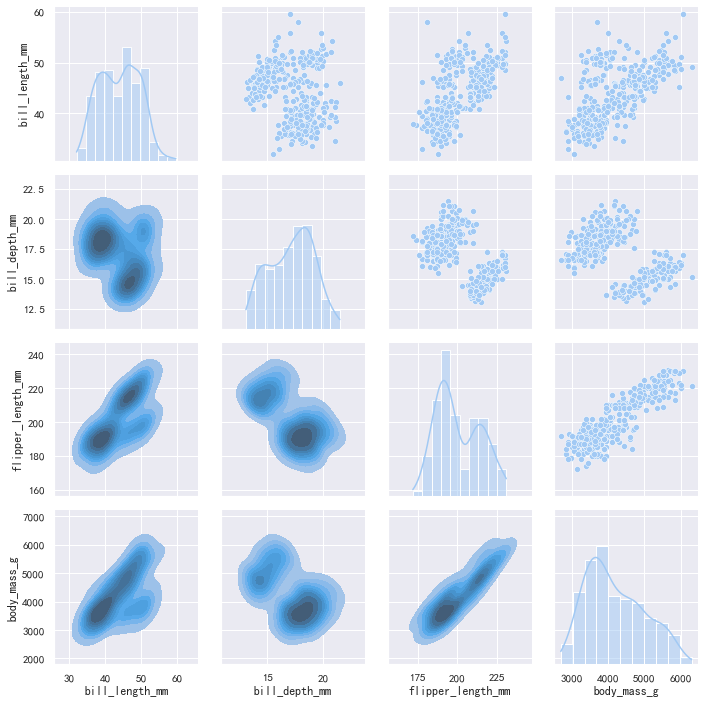

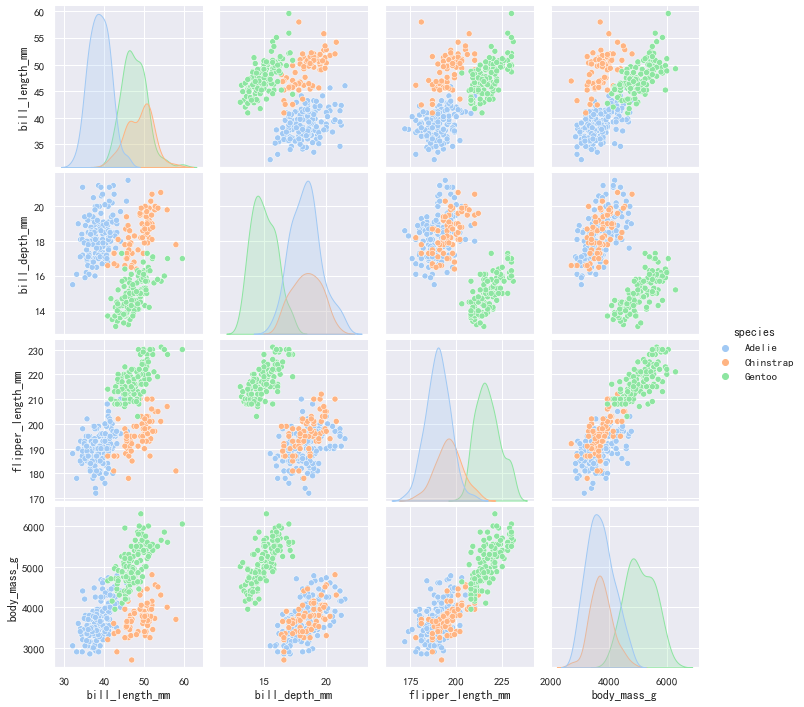

In [29]:
penguins = sns.load_dataset("penguins")
g = sns.PairGrid(penguins)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
#g.savefig('./sns样图/多变量分布.png')
sns.pairplot(penguins,hue="species")


# caplot（数值+类别变量可视化）


## 分类散点图


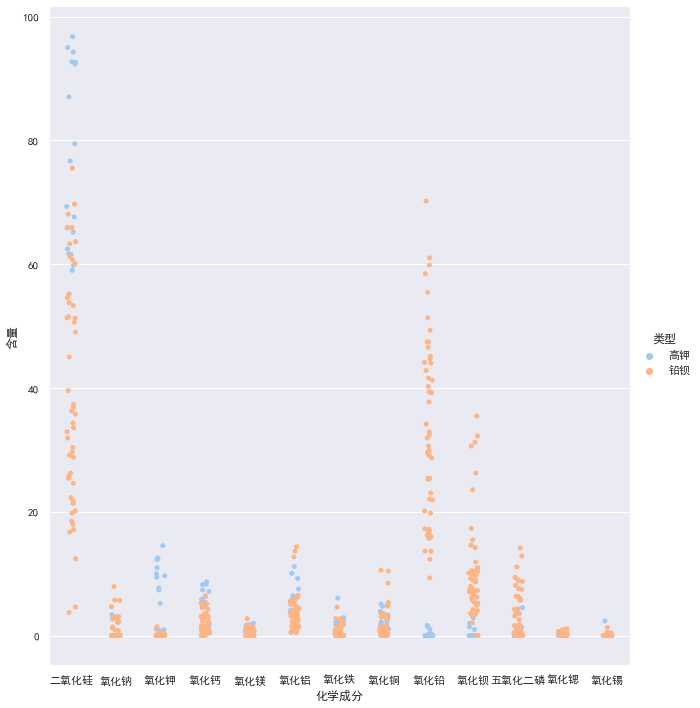

In [ ]:
data = pd.read_excel('./datasets/desc-data.xlsx')
data_melt = data.melt(id_vars=['文物编号', '类型'], var_name=[
                      '化学成分'], value_vars=data.columns[6:-1], value_name='含量')
sns.catplot(data=data_melt, x="化学成分", y="含量", kind='strip'  # 'swarm'昆虫形状
            , jitter=True  # 是否抖动(数据量较少比较推荐)
            , hue='类型', height=10, aspect=.9)
# g.savefig('./sns样图/分类散点图.png')

In [ ]:
import seaborn.objects as so
sns.catplot(data=data_melt, x="化学成分", y="含量", kind='strip'  # 'swarm'昆虫形状
            , jitter=True  # 是否抖动(数据量较少比较推荐)
            , hue='类型', height=10, aspect=.9)
(
    so.Plot(data_melt,x="化学成分",y="含量",color="类型")
    .add(so.Dot(),so.Dodge())
    )

## 分类分布图


### 箱线图


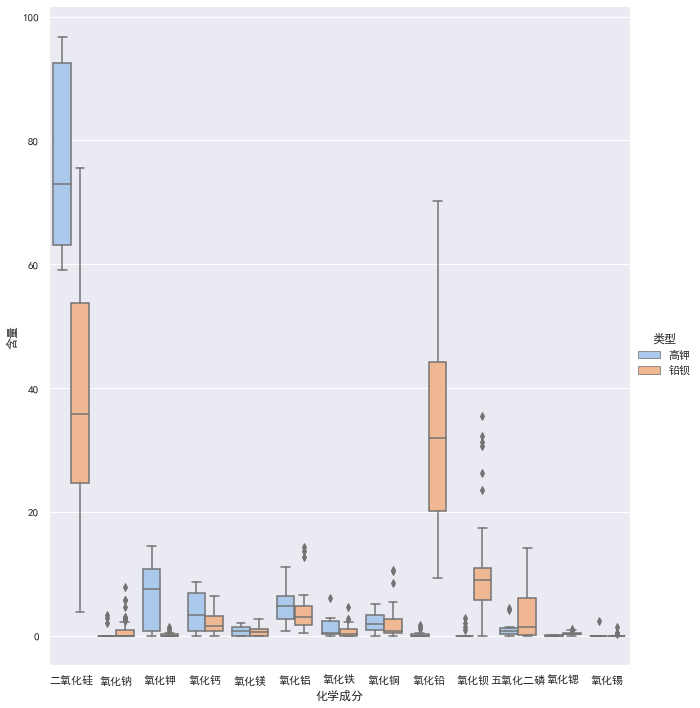

In [38]:
import pandas as pd
import seaborn as sns
data = pd.read_excel('./datasets/desc-data.xlsx')
data_melt = data.melt(id_vars=['文物编号', '类型'], var_name=[
                      '化学成分'], value_vars=data.columns[6:-1], value_name='含量')
g = sns.catplot(data_melt
                , x="化学成分"
                , y="含量"
                , hue='类型'
                , kind="box"  # {'volin':小提琴图,'boxen':箱型图}
                , height=10
                , aspect=.9)
g.savefig('./sns样图/分类箱线图.png')


### 条形图绘制


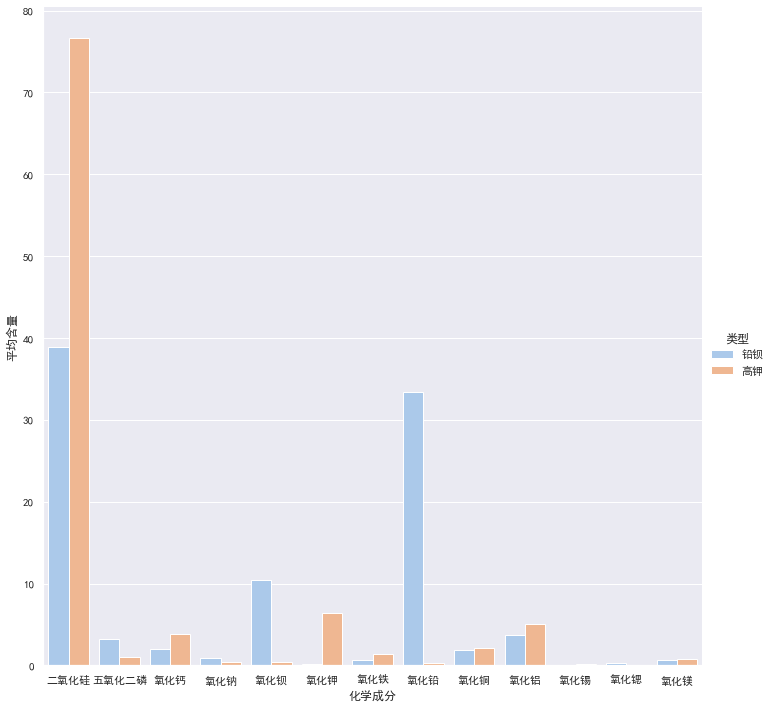

In [ ]:
# 纵向
data = pd.read_excel('./datasets/desc-data.xlsx')
data_melt = data.melt(id_vars=['文物编号', '类型'], var_name=[
                      '化学成分'], value_vars=data.columns[6:-1], value_name='含量')
data_mean = data_melt.groupby(['类型', '化学成分']).mean().reset_index()
g = sns.catplot(data=data_mean, x="化学成分", y="含量",
                hue='类型', height=10, kind='bar')
g.set(ylabel='平均含量')
g.savefig('./sns样图/分类柱状图.png')


Index(['年份', '地区生产总值（单位:亿元）', '第一产业', '第二产业', '第三产业', '人均生产总值',
       '人 均 生产总值 （美元）'],
      dtype='object')

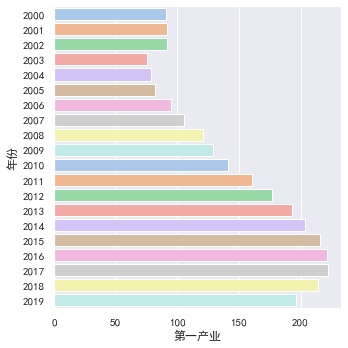

In [ ]:
# 横向
data = pd.read_excel('./datasets/历年地区生产总值.xlsx')
g = sns.catplot(data=data, x='第一产业', y='年份', kind='bar',
                orient='h', palette='pastel')
g.savefig('./sns样图/分类横向条形图.png')


c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\lm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core\plot.py:934: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  self._figure.savefig(buffer, dpi=

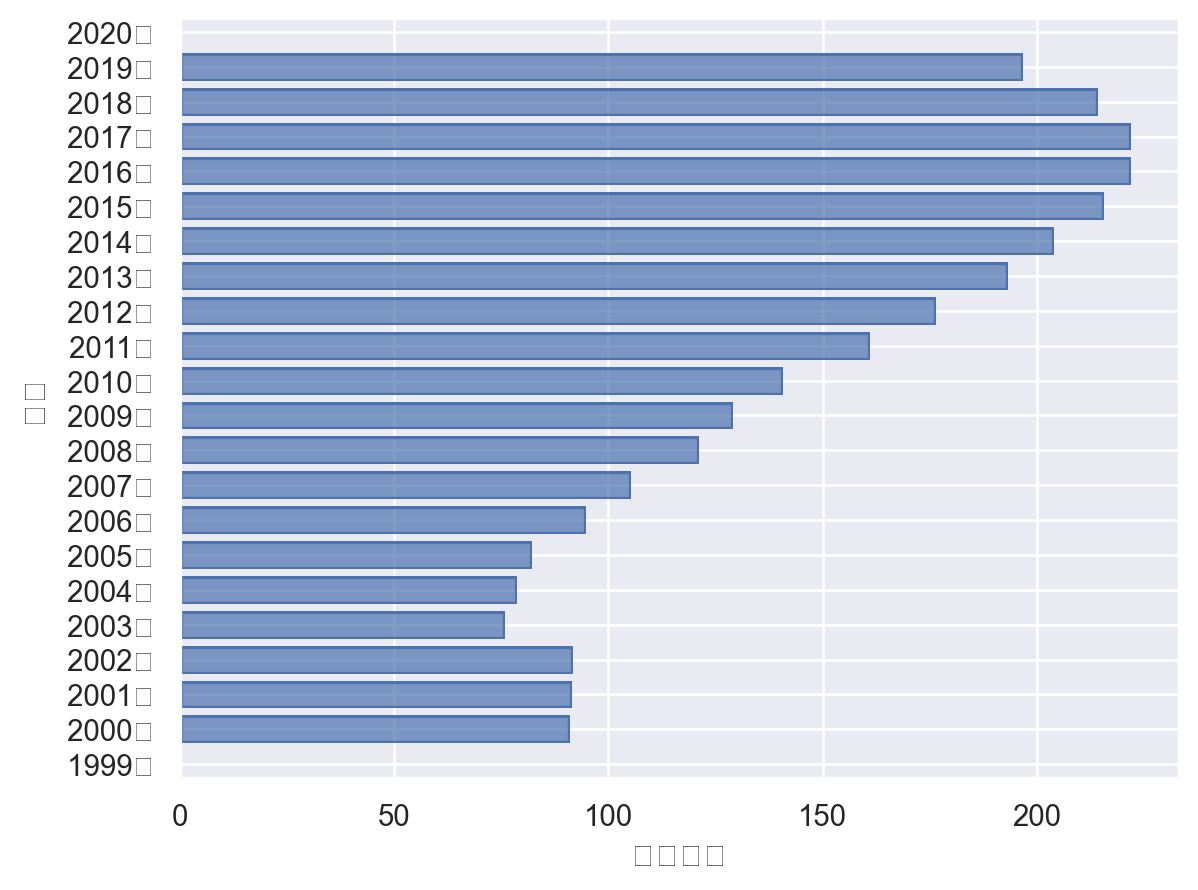

In [2]:
data = pd.read_excel('./datasets/历年地区生产总值.xlsx')
(
    so.Plot(data, x="第一产业", y="年份")
    .add(so.Bar(), orient="y")
    .scale(y=so.Continuous().tick(every=1)#.label(like="{x: .0f}年"))
)


### 箱型图


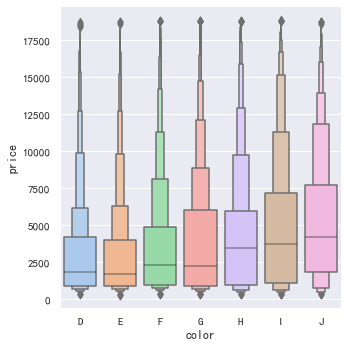

In [71]:
diamonds = sns.load_dataset("diamonds")
g = sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen", 
)
g.savefig('./sns样图/分类箱型图.png')


### 点图


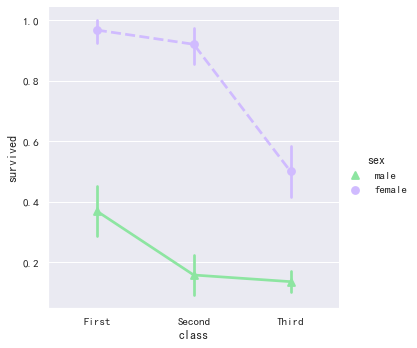

In [72]:
titanic = sns.load_dataset('titanic')
g = sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)
# g.savefig('./sns样图/分类点图.png')


# 热力图


<AxesSubplot:>

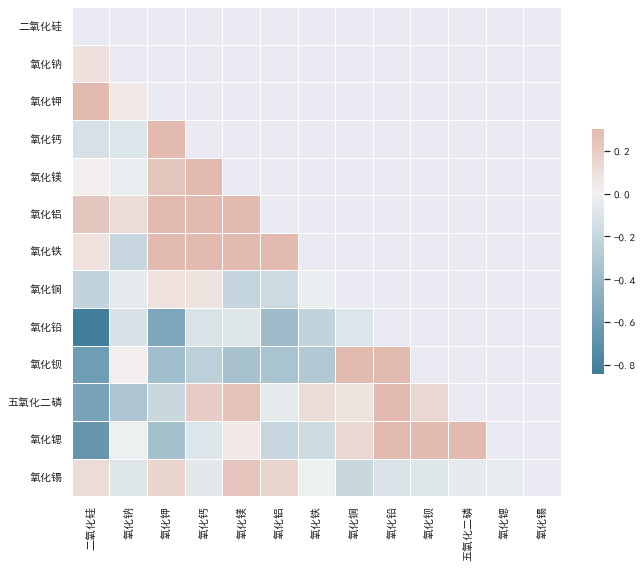

In [73]:
import numpy as np
df = pd.read_excel('./datasets/desc-data.xlsx')
corr = df.iloc[:, 6:-1].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# 多figure

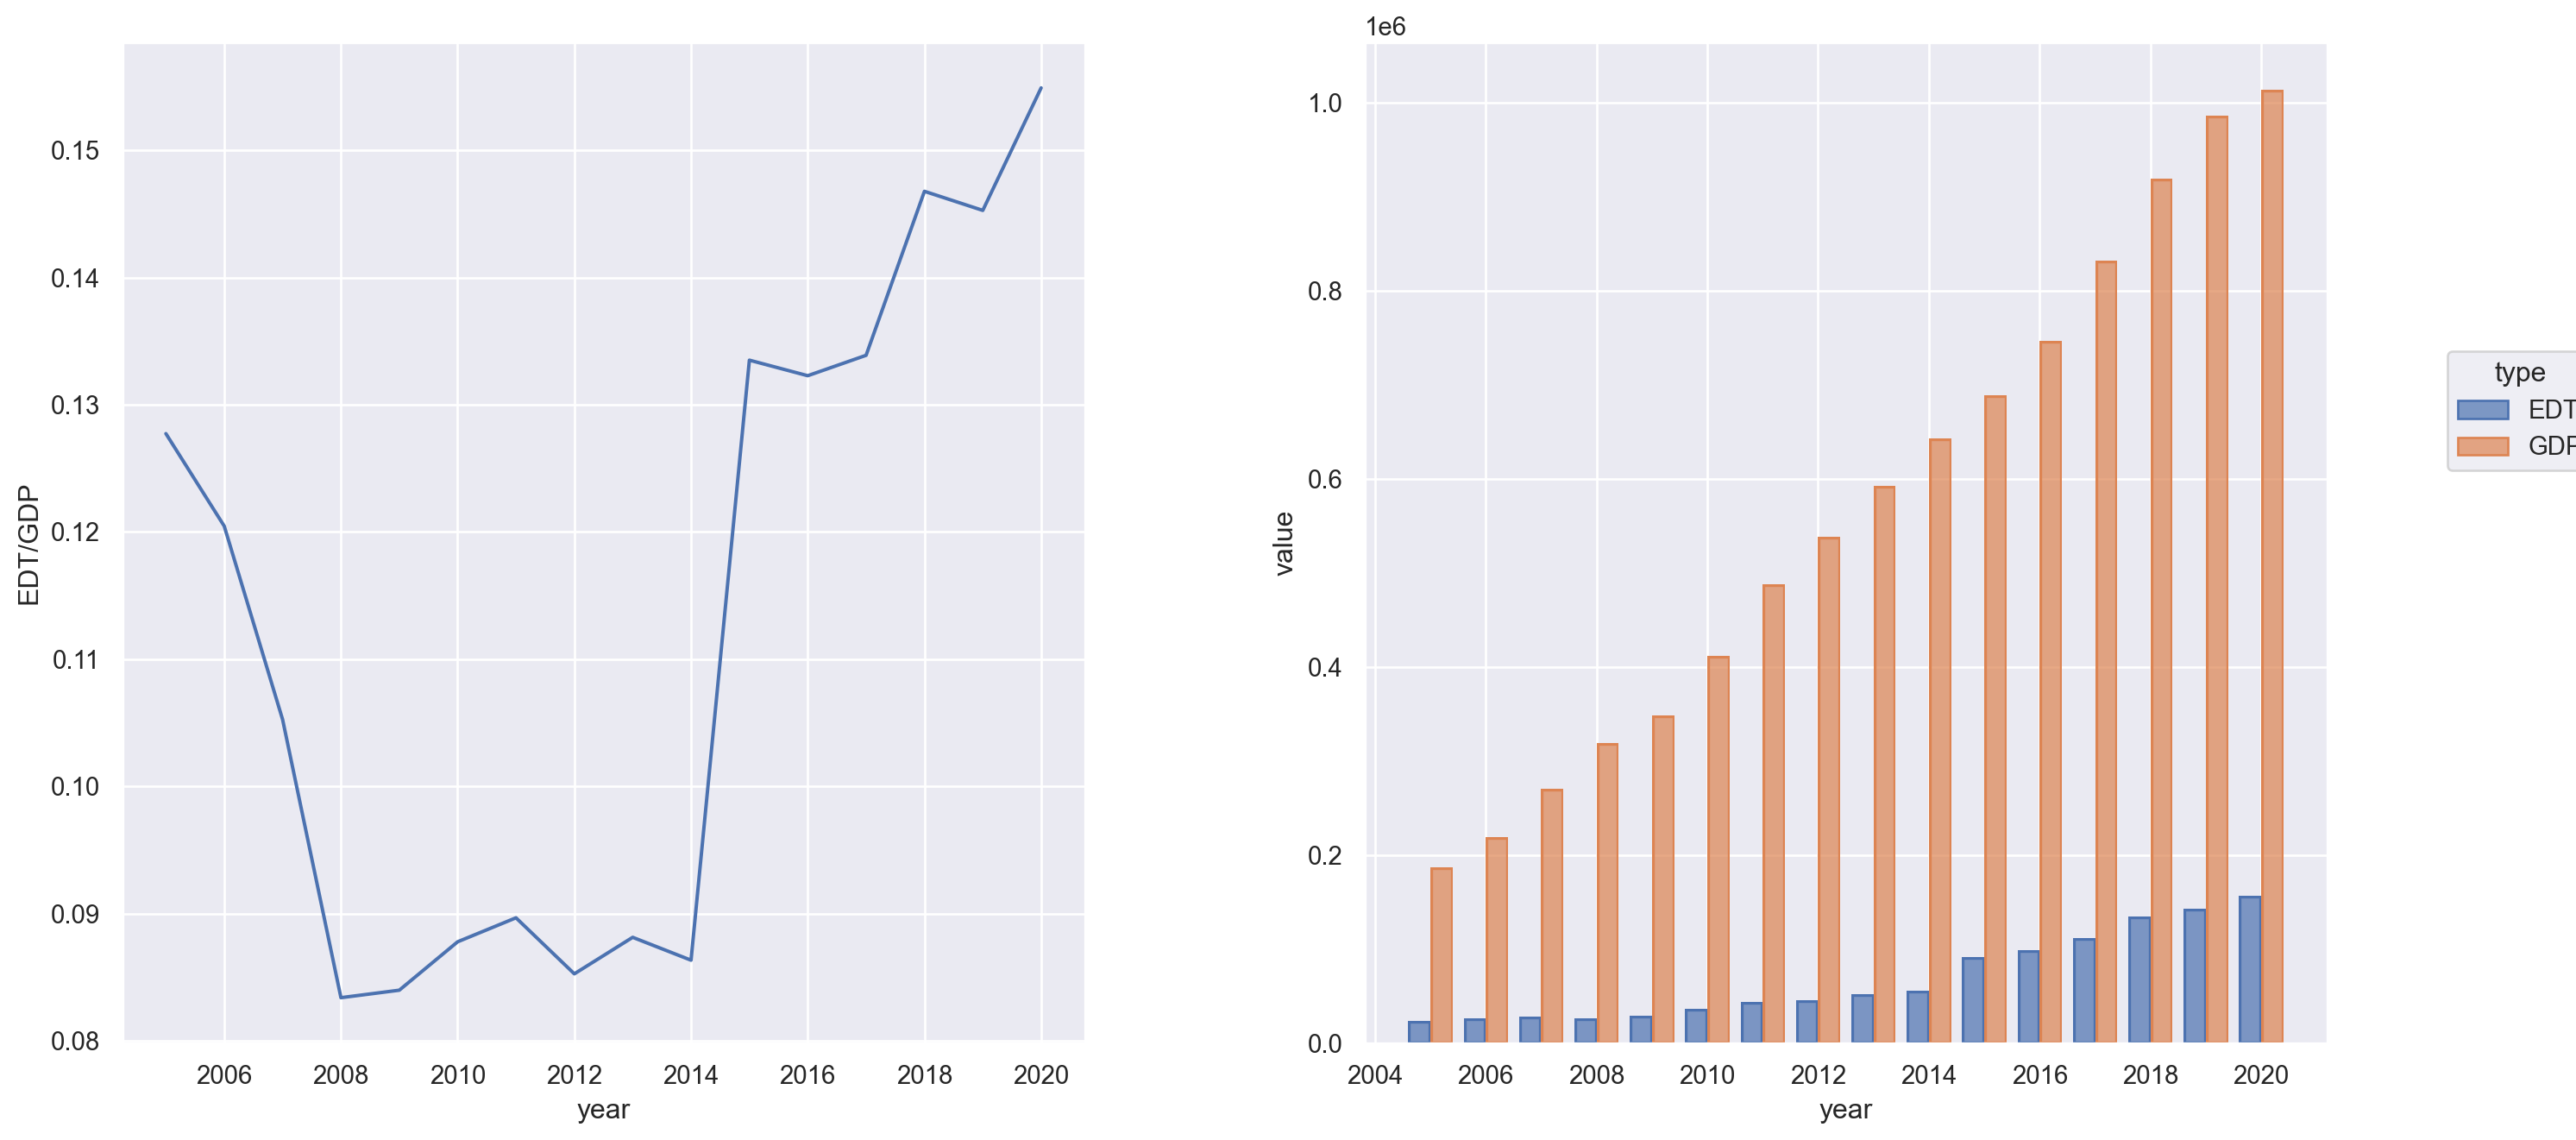

In [23]:
f = mpl.figure.Figure(figsize=(15, 8), facecolor='white')
sf1, sf2 = f.subfigures(1, 2)  # subfigures
(
    so.Plot(data, x="year", y="fuzhai")
    .add(so.Line())  # 左边子图添加散点图
    .label(x="year", y="EDT/GDP")
    .scale(x=so.Continuous().tick(every=2),)
    .on(sf1)
    .plot()
    #.show()
)
(
    so.Plot(data1, x="year", y='value')
    .label(x="year", y="{}".format)
    .add(so.Bar(), so.Dodge(), color='type')  # 右边子图添加bar和hist图
    .scale(x=so.Continuous().tick(every=2),)
    .on(sf2)
    .plot()
    #.show()
)


# 多子图

## 数据准备

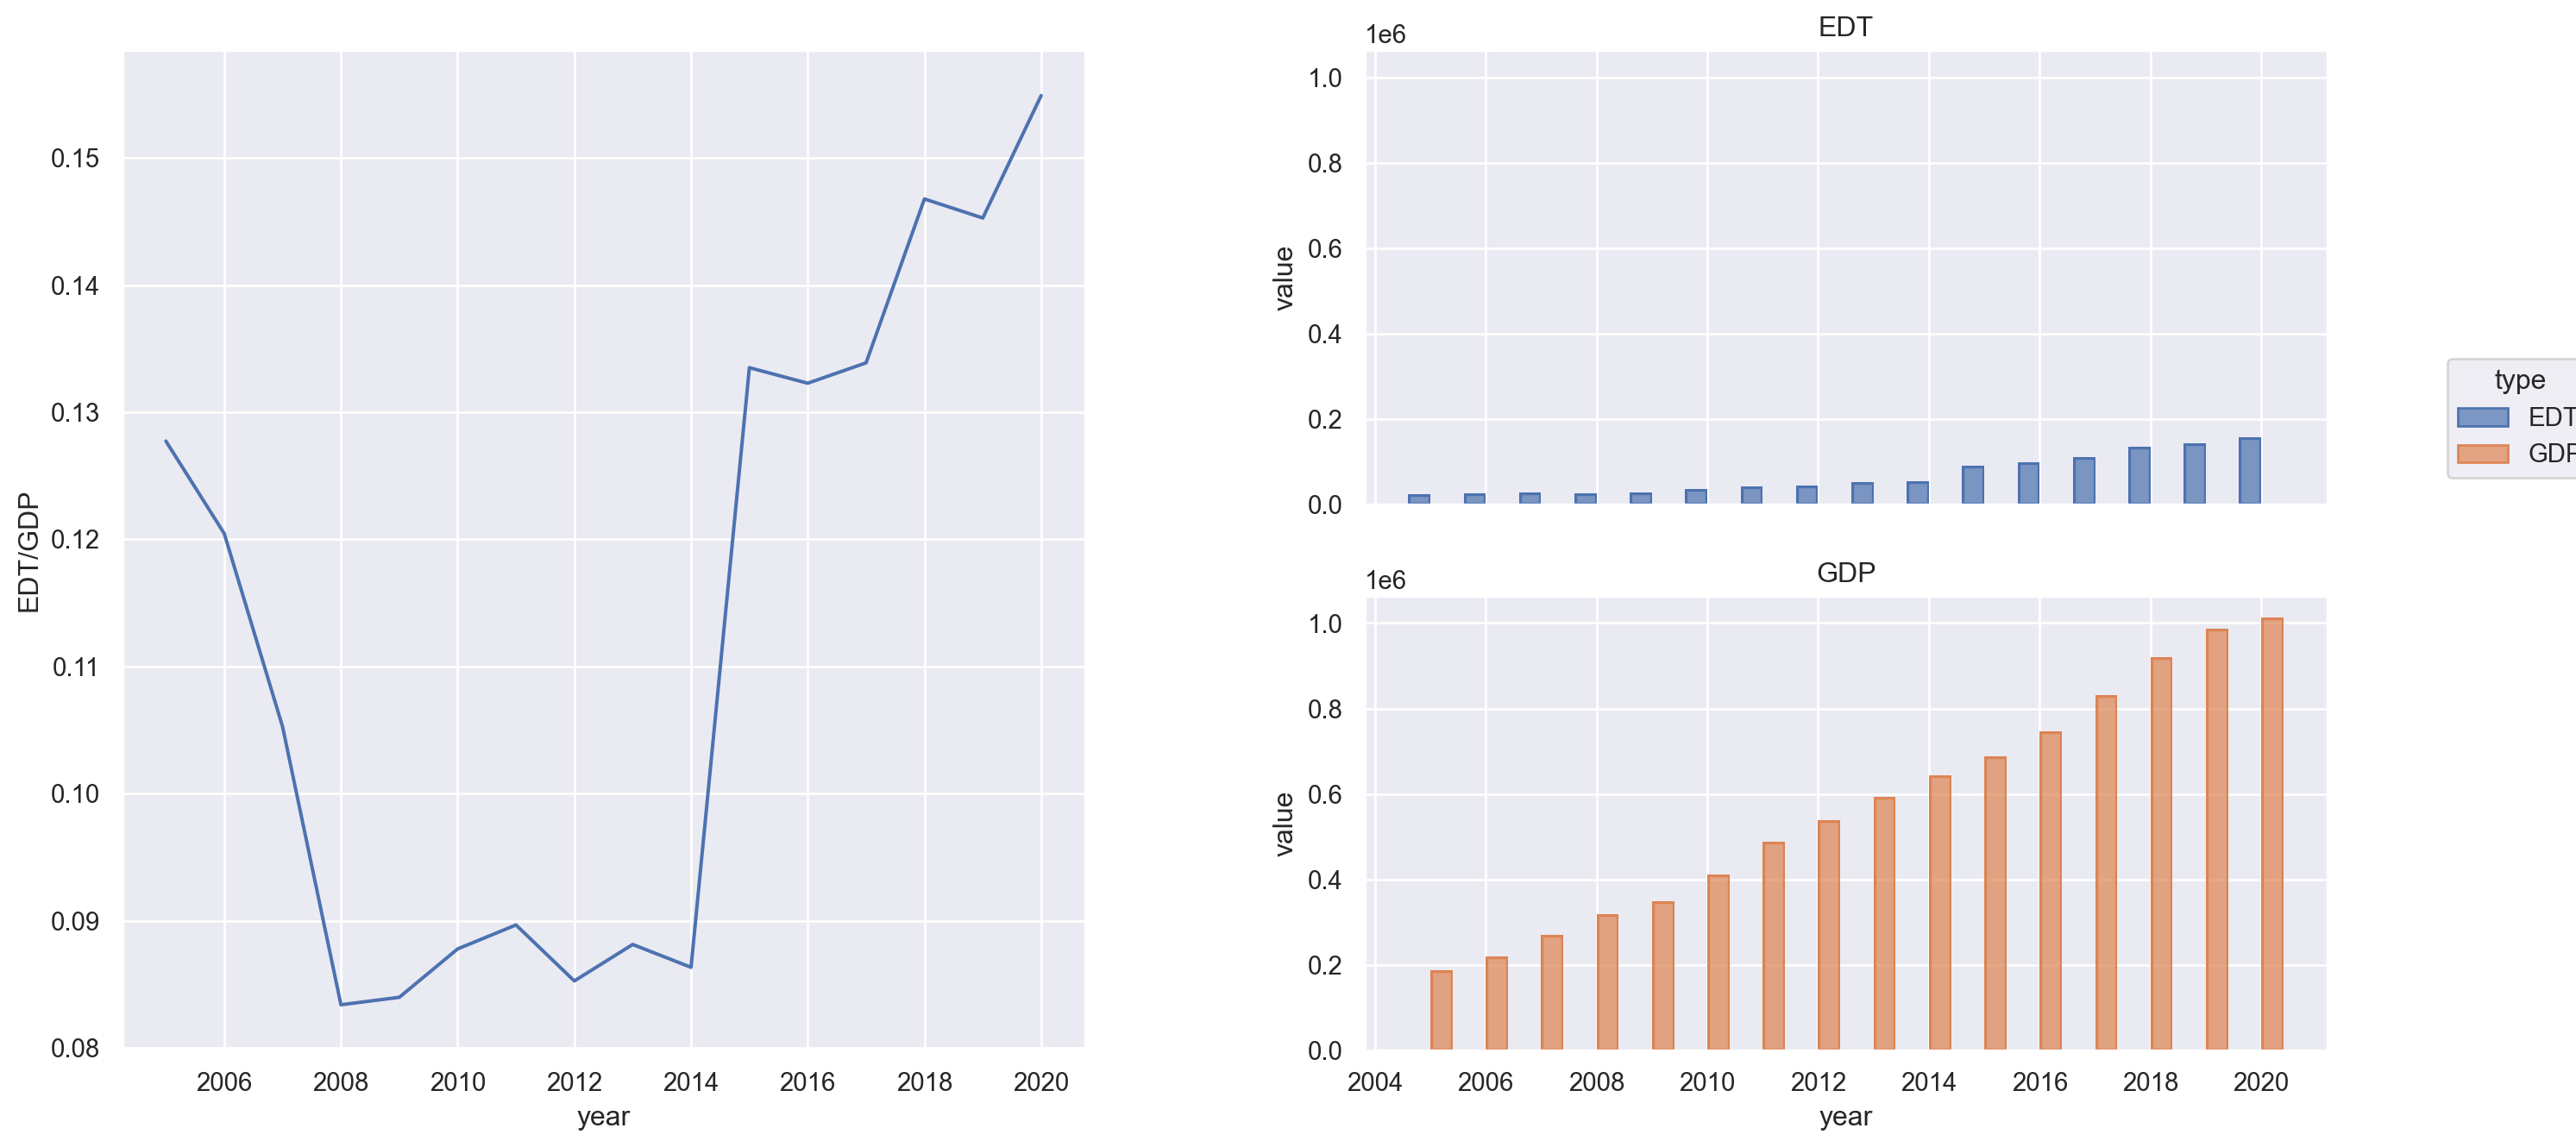

In [2]:
import seaborn.objects as so
import seaborn as sns
import matplotlib as mpl
import pandas as pd
sns.set_style("darkgrid", {"font.sans-serif": ['simhei', 'Arial']})
#plt.rcParams['axes.unicode_minus'] = False
edt_data = pd.read_excel('./data/外债余额_人民币_年度.xlsx')
edt_data['年份'] = pd.to_datetime(edt_data['年份']).dt.year
gdp_data = pd.read_excel('./data/GDP.xlsx')
gdp_data['年份'] = pd.to_datetime(gdp_data['年份']).dt.year
# 计算两个df指定列的差值


def cal_diff(df1, df2, col1, col2):
    df1 = df1.set_index('年份')
    df2 = df2.set_index('年份')
    df = df1.join(df2)
    df['负债率'] = df[col1]/df[col2]
    return df
data = cal_diff(edt_data, gdp_data,
                edt_data.columns[-1], gdp_data.columns[-1]).reset_index()[20:-1]

data.columns=['year', 'EDT', 'GDP', 'fuzhai']
data1 = data.melt(id_vars=['year'], var_name='type',
                 value_vars=['EDT', 'GDP'], value_name='value')
%matplotlib inline


In [ ]:

f = mpl.figure.Figure(figsize=(15, 8),facecolor='white')
sf1, sf2 = f.subfigures(1, 2)  # subfigures
(
    so.Plot(data, x="year", y="fuzhai")
    .add(so.Line())  # 左边子图添加散点图
    .label(x="year", y="EDT/GDP")
    .scale(x=so.Continuous().tick(every=2),)
    .on(sf1)
    .plot()
    #.show()
)
(
    so.Plot(data1, x="year",y='value',color='type')
    .facet(row="type")
    .label(x="year",y="{}".format)
    .add(so.Bar(), so.Dodge())  # 右边子图添加bar和hist图
    .scale(x=so.Continuous().tick(every=2),)
    .on(sf2)
    .plot()
    #.show()
)
#f.savefig('./sns样图/多子图.png',bbox_inches = 'tight')

## 自定义子图


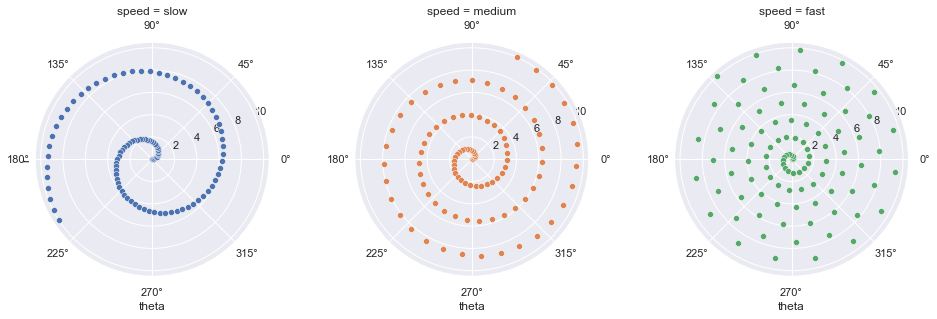

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")
